# 1 Random Forest

Random Forest is a ensemble machine learning algorithm that follows the bagging technique. The base estimators in random forest are decision trees. RF randomly selects a set of features which are used to decide the best split at each node of the decision tree.

Looking at it step-by-step, this is what a random forest model does:

    Random subsets are created from the original dataset (bootstrapping).
    At each node in the decision tree, only a random set of features are considered to decide the best split.
    A decision tree model is fitted on each of the subsets.
    The final prediction is calculated by averaging the predictions from all decision trees.

Note: The decision trees in random forest can be built on a subset of data and features. Particularly, the sklearn model of random forest uses all features for decision tree and a subset of features are randomly selected for splitting at each node.

To sum up, Random forest randomly selects data points and features, and builds multiple trees (Forest) . 
***

# 1.2 RF Hyper Parameters

    n_estimators:
        It defines the number of decision trees to be created in a random forest.
        Generally, a higher number makes the predictions stronger and more stable, but a very large number can result in higher training time.
    criterion:
        It defines the function that is to be used for splitting.
        The function measures the quality of a split for each feature and chooses the best split.
    max_features :
        It defines the maximum number of features allowed for the split in each decision tree.
        Increasing max features usually improve performance but a very high number can decrease the diversity of each tree.
    max_depth:
        Random forest has multiple decision trees. This parameter defines the maximum depth of the trees.
    min_samples_split:
        Used to define the minimum number of samples required in a leaf node before a split is attempted.
        If the number of samples is less than the required number, the node is not split.
    min_samples_leaf:
        This defines the minimum number of samples required to be at a leaf node.
        Smaller leaf size makes the model more prone to capturing noise in train data.
    max_leaf_nodes:
        This parameter specifies the maximum number of leaf nodes for each tree.
        The tree stops splitting when the number of leaf nodes becomes equal to the max leaf node.
    n_jobs:
        This indicates the number of jobs to run in parallel.
        Set value to -1 if you want it to run on all cores in the system.
    random_state:
        This parameter is used to define the random selection.
        It is used for comparison between various models.


In [1]:
# Load required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from KUtils.eda import chartil
from KUtils.common import utils as cutils

from KUtils.common import utils
from KUtils.eda import chartil
from KUtils.eda import data_preparation as dp

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, recall_score, precision_score

In [2]:
adult_income_df = pd.read_csv('cleaned.csv')

In [3]:
# encode categorical variables using Label Encoder
# select all categorical variables
df_categorical = adult_income_df.select_dtypes(include=['object'])
df_categorical.head()

# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

# concat df_categorical with original df
adult_income_df = adult_income_df.drop(df_categorical.columns, axis=1)
adult_income_df = pd.concat([adult_income_df, df_categorical], axis=1)
adult_income_df.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,target
0,39,11.258240,13,2174,0,40,5,9,4,0,1,4,1,0,0
1,50,11.330336,13,0,0,13,4,9,2,3,0,4,1,0,0
2,38,12.281393,9,0,0,40,2,11,0,5,1,4,1,0,0
3,53,12.366153,7,0,0,40,2,1,2,5,0,2,1,0,0
4,28,12.732011,13,0,0,40,2,9,2,9,5,2,0,1,0
5,37,12.558777,14,0,0,40,2,12,2,3,5,4,0,0,0
6,49,11.984097,5,0,0,16,2,6,3,7,1,2,0,1,0
7,52,12.253157,9,0,0,45,4,11,2,3,0,4,1,0,1
8,31,10.731624,14,14084,0,50,2,12,4,9,1,4,0,0,1
9,42,11.979479,13,5178,0,40,2,9,2,3,0,4,1,0,1


In [4]:
from sklearn.preprocessing import StandardScaler
numerical_column_names = ['age','fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()

adult_income_df[numerical_column_names] = scaler.fit_transform(adult_income_df[numerical_column_names])

C:\Users\keshav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\keshav\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
# convert target variable income to categorical
adult_income_df['target'] = adult_income_df['target'].astype('category')

X = adult_income_df.drop('target', axis=1)
y = adult_income_df['target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=43)

In [6]:
rfc = RandomForestClassifier(n_jobs = -1)
rfc.fit(X_train,y_train)

# Making predictions
y_pred_default = rfc.predict(X_test)



C:\Users\keshav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [7]:
# Printing classification report
print(classification_report(y_test, y_pred_default))

local_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_default )

# Printing confusion matrix and accuracy
print('Confusion Matrix:')
print(local_confusion_matrix)

# Accuracy, precision, recall and f1 score
print('\nScores:')
accuracy = metrics.accuracy_score(y_test, y_pred_default)
precision = metrics.precision_score(y_test, y_pred_default)
recall = metrics.recall_score(y_test, y_pred_default)
f1_score = metrics.f1_score(y_test, y_pred_default)
roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
sensitivity = recall
specificity =  local_confusion_matrix[0,0]/(local_confusion_matrix[0,0]+local_confusion_matrix[0,1])
print(" Accuracy {0:.3f}, \n Sensitivity {1:.3f}, \n Specificity {2:.3f}, \n Precision {3:.3f}, \n Recall {4:.3f}, \n f1_score {5:.3f}, \n roc_auc {6:.3f}".format(
    accuracy, sensitivity,specificity, precision,recall,f1_score,roc_auc))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6972
           1       0.73      0.59      0.65      2244

   micro avg       0.85      0.85      0.85      9216
   macro avg       0.80      0.76      0.78      9216
weighted avg       0.84      0.85      0.84      9216

Confusion Matrix:
[[6488  484]
 [ 924 1320]]

Scores:
 Accuracy 0.847, 
 Sensitivity 0.588, 
 Specificity 0.931, 
 Precision 0.732, 
 Recall 0.588, 
 f1_score 0.652, 
 roc_auc 0.759


# Hyperparameter Tuning

In [8]:
from KUtils.classifier import generic_classifier_utils as gcu
import importlib
importlib.reload(gcu)

<module 'KUtils.classifier.generic_classifier_utils' from 'D:\\projects\\datascience\\kesh-utils\\KUtils\\classifier\\generic_classifier_utils.py'>

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  1.5min finished


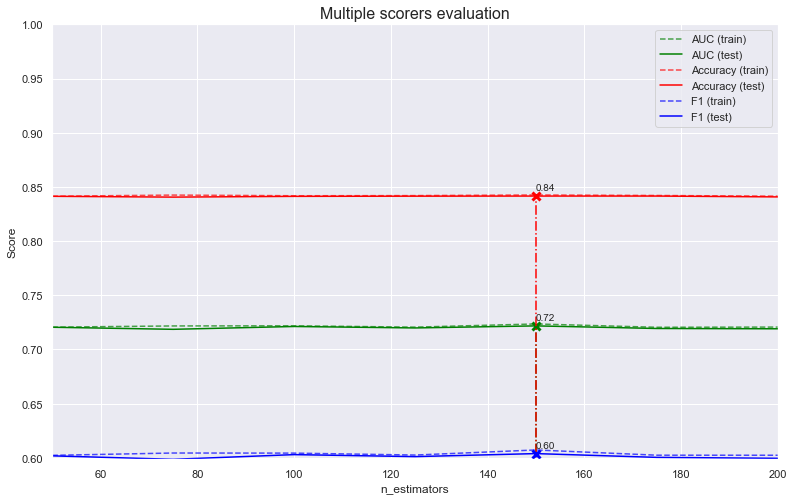

Best score 0.7217761035541741
Best Estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [19]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=10, 
                                                hyper_parameter_name='n_estimators',
                                                hyper_parameter_range =range(50, 201, 25),                                                
                                                classifier_algo=RandomForestClassifier(max_depth=4))

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


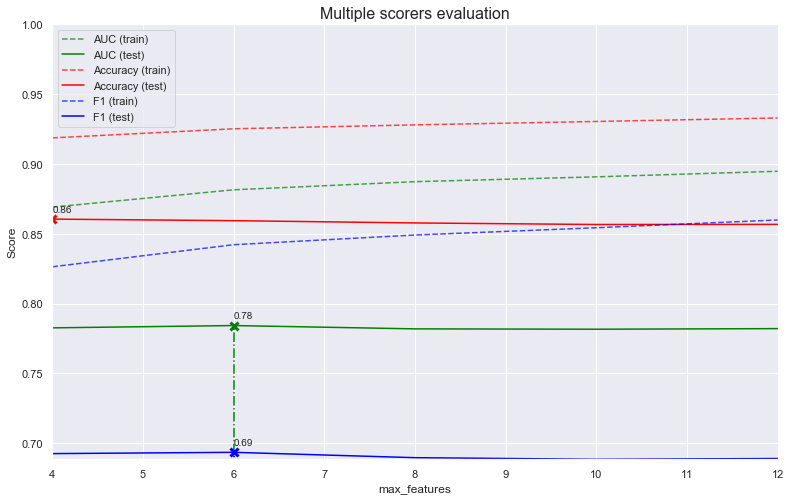

Best score 0.7841981356661818
Best Estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [17]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=10, 
                                                hyper_parameter_name='max_features',
                                                hyper_parameter_range =[4, 6, 8, 10, 12],                                                
                                                classifier_algo=RandomForestClassifier(max_depth=15, n_estimators=50))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.9min finished


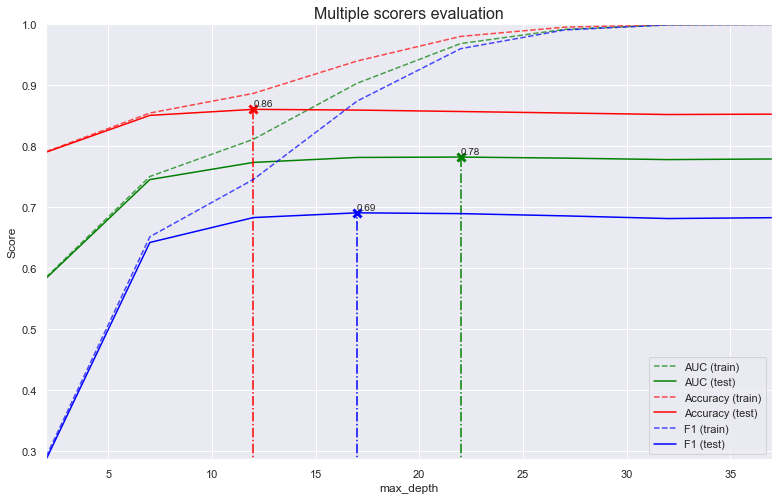

Best score 0.7822460759932928
Best Estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=22, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [20]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=10, 
                                                hyper_parameter_name='max_depth',
                                                hyper_parameter_range = range(2, 40, 5),                                                
                                                classifier_algo=RandomForestClassifier(n_estimators=100, n_jobs = -1))

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   58.0s finished


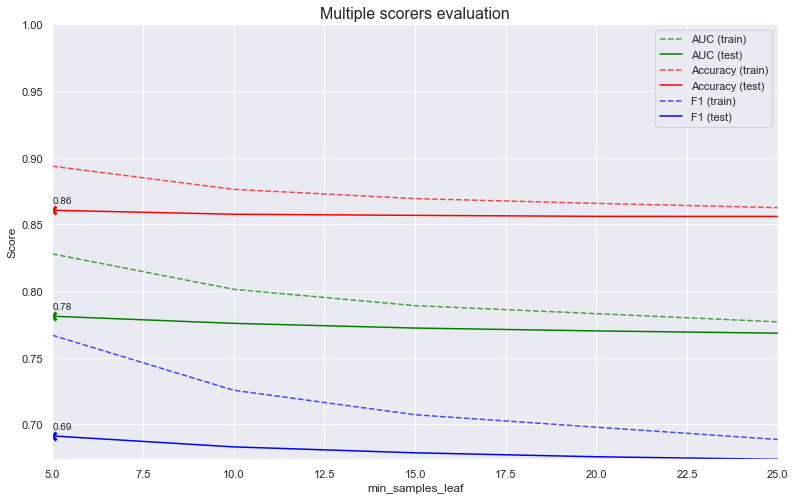

Best score 0.7811667806983918
Best Estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [21]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=10, 
                                                hyper_parameter_name='min_samples_leaf',
                                                hyper_parameter_range = range(5, 26, 5),                                                
                                                classifier_algo=RandomForestClassifier(n_estimators=100, n_jobs = -1))

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


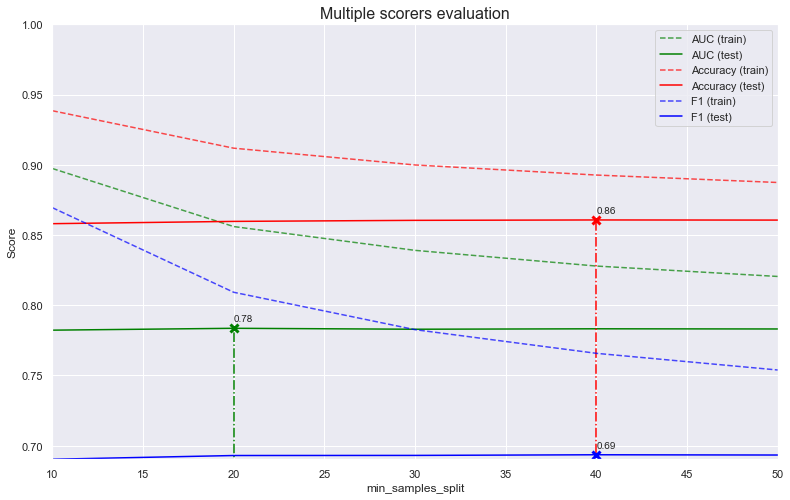

Best score 0.7835560567570796
Best Estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [22]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=10, 
                                                hyper_parameter_name='min_samples_split',
                                                hyper_parameter_range = range(10, 51, 10),                                                
                                                classifier_algo=RandomForestClassifier(n_estimators=100, n_jobs = -1))

# Put it all together, Final model and its performance

In [9]:
# Running the model with best parameters obtained from grid search
# model with optimal hyperparameters\n",
final_model = RandomForestClassifier(random_state = 43,
                                     min_samples_split=20, 
                                     min_samples_leaf=5,
                                     max_depth=12,
                                     max_features=6,
                                     n_estimators=100,
                                  )
final_model.fit(X_train, y_train)

# Making predictions
y_pred_default = final_model.predict(X_test)

In [10]:
# Printing classification report
print(classification_report(y_test, y_pred_default))

local_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_default )

# Printing confusion matrix and accuracy
print('Confusion Matrix:')
print(local_confusion_matrix)

# Accuracy, precision, recall and f1 score
print('\nScores:')
accuracy = metrics.accuracy_score(y_test, y_pred_default)
precision = metrics.precision_score(y_test, y_pred_default)
recall = metrics.recall_score(y_test, y_pred_default)
f1_score = metrics.f1_score(y_test, y_pred_default)
roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
sensitivity = recall
specificity =  local_confusion_matrix[0,0]/(local_confusion_matrix[0,0]+local_confusion_matrix[0,1])
print(" Accuracy {0:.3f}, \n Sensitivity {1:.3f}, \n Specificity {2:.3f}, \n Precision {3:.3f}, \n Recall {4:.3f}, \n f1_score {5:.3f}, \n roc_auc {6:.3f}".format(
    accuracy, sensitivity,specificity, precision,recall,f1_score,roc_auc))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6972
           1       0.76      0.62      0.68      2244

   micro avg       0.86      0.86      0.86      9216
   macro avg       0.82      0.78      0.80      9216
weighted avg       0.85      0.86      0.85      9216

Confusion Matrix:
[[6533  439]
 [ 860 1384]]

Scores:
 Accuracy 0.859, 
 Sensitivity 0.617, 
 Specificity 0.937, 
 Precision 0.759, 
 Recall 0.617, 
 f1_score 0.681, 
 roc_auc 0.777


In [11]:
y_pred_proba_default = final_model.predict_proba(X_test)
gnb_df = pd.DataFrame({'row_id':y_test.index , 'Actual':y_test.values,'gnb_proba':y_pred_proba_default[:,1]})
gnb_df.to_csv('rf_df.csv', index=False)

[0.07253542 0.03349716 0.17795909 0.20480036 0.04538451 0.04816126
 0.01648314 0.02340548 0.09616468 0.02917722 0.2413693  0.00387599
 0.00561437 0.001572  ]


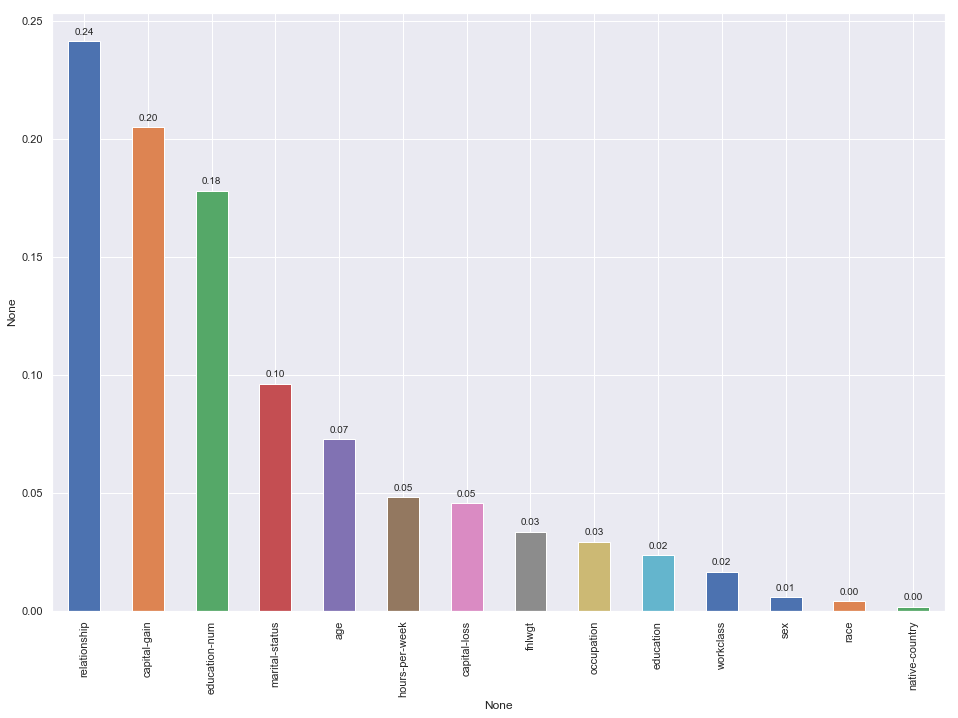

In [25]:
# Feature importance
importances = final_model.feature_importances_
print(importances)

unique_dict = dict(zip(X_train.columns, importances))

chartil.core_barchart_from_series(
    pd.Series(unique_dict), 
    optional_settings={'sort_by_value':True, 'decimal_precision':2}) 

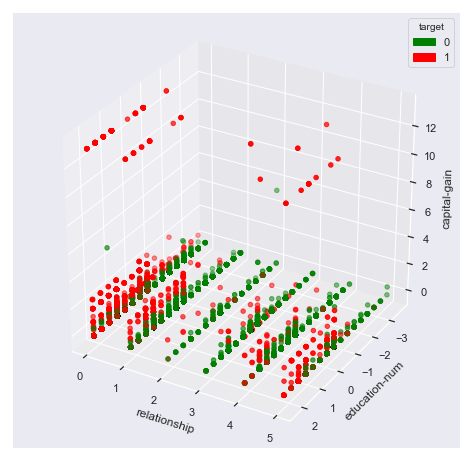

In [26]:
chartil.plot(adult_income_df, ['relationship','education-num', 'capital-gain',  'target'])